In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from reynir import Greynir
import re

%matplotlib inline

In [29]:
imdb_google = pd.read_csv("../IMDB-Dataset-GoogleTranslate.csv")
imdb_google.head()

,review,sentiment
0,Hvattur af jákvæðum ummælum um þessa mynd hérn...,negative
1,Einn hinna gagnrýnenda hefur nefnt að eftir að...,positive
2,Yndisleg lítil framleiðsla. Kvikmyndatæknin er...,positive
3,"""Love in the Time of Money"" eftir Petter Matte...",positive
4,Í grundvallaratriðum er fjölskylda þar sem lít...,negative


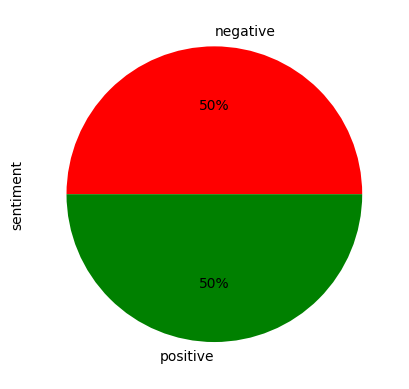

In [32]:
imdb_google.sentiment.value_counts().plot(
    kind="pie", autopct="%1.0f%%", colors=["red", "green"]
);

In [25]:
imdb_mideind = pd.read_csv("../IMDB-Dataset-MideindTranslate.csv")
imdb_mideind.head()

,review,sentiment
0,Einn af hinum rýnunum hefur nefnt að eftir að ...,positive
1,Dásamleg lítil framleiðsla. Kvikmyndatæknin er...,positive
2,Mér fannst þetta dásamleg leið til að eyða tím...,positive
3,Eiginlega er fjölskylda þar sem lítill strákur...,negative
4,„Ást á tímum peninga“ eftir Petter Mattei er s...,positive


<Axes: ylabel='sentiment'>

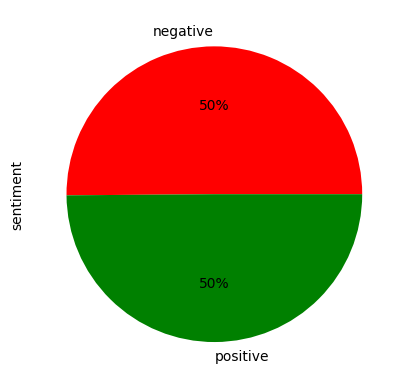

In [33]:
imdb_mideind.sentiment.value_counts().plot(
    kind="pie", autopct="%1.0f%%", colors=["red", "green"]
)

In [34]:
imdb_mideind.count()

review       48709
sentiment    48709
dtype: int64

In [15]:
def process_review(review):
    return review
    # with open(file_path, 'r') as f:
    #     words_to_remove = set(f.read().splitlines())

    # review = review.lower()
    # review = re.sub(r'\d+', '', review) # remove numbers from review text
    # review = re.sub(r'[^\w\s]', '', review) # remove punctuation from review text
    # review = review.strip() # remove leading and trailing spaces
    # review_words = []
    # for word in review.split():
    #     if word not in words_to_remove:
    #         review_words.append(word)

    # return ' '.join(review_words)

    # g = Greynir()
    # processed_review = ''
    # for word in review.split():
    #     if word not in words_to_remove:
    #         lemmas = g.parse_single(word).lemmas
    #         if lemmas:
    #             processed_review += lemmas[0] + ' '
    #         else:
    #             processed_review += word + ' '

    # return review

In [59]:
def build_freqs(reviews, sentiments):
    freqs = {}
    for review, sentiment in zip(reviews, sentiments):
        for word in process_review(review).split():
            pair = (word, sentiment)
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

In [5]:
def extract_features(review, freqs):
    x = np.zeros((1, 3))
    x[0, 0] = 1
    for word in set(review.split()):
        x[0, 1] += freqs.get((word, 1), 0)
        x[0, 2] += freqs.get((word, 0), 0)
    return x

In [52]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.7027


In [53]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[[3471 1507]
 [1466 3556]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4978
           1       0.70      0.71      0.71      5022

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [54]:
reviews = imdb_mideind["review"].values
sentiments = imdb_mideind["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.6832272633956067


In [55]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print(classification_report(y_test, y_pred))

[[3001 1819]
 [1267 3655]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      4820
           1       0.67      0.74      0.70      4922

    accuracy                           0.68      9742
   macro avg       0.69      0.68      0.68      9742
weighted avg       0.69      0.68      0.68      9742



In [57]:
from process import TextNormalizer

tn = TextNormalizer()


def process_review(review):
    return tn.process(review)

In [60]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.6947


In [61]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[[3684 1294]
 [1759 3263]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      4978
           1       0.72      0.65      0.68      5022

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
reviews = imdb_mideind["review"].values
sentiments = imdb_mideind["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.6832272633956067


In [ ]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print(classification_report(y_test, y_pred))

[[3001 1819]
 [1267 3655]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      4820
           1       0.67      0.74      0.70      4922

    accuracy                           0.68      9742
   macro avg       0.69      0.68      0.68      9742
weighted avg       0.69      0.68      0.68      9742



In [40]:
# test
my_review = "geggjuð mynd"
x = extract_features(my_review, freqs)
y_pred = model.predict(x)
print("Review: {}".format(my_review))
print("Sentiment: {}".format("positive" if y_pred[0] == 1 else "negative"))

Review: geggjuð mynd
Sentiment: negative


In [41]:
# test
my_review = "ömurleg mynd"
x = extract_features(my_review, freqs)
y_pred = model.predict(x)
print("Review: {}".format(my_review))
print("Sentiment: {}".format("positive" if y_pred[0] == 1 else "negative"))

Review: ömurleg mynd
Sentiment: negative
